In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-06 16:27:20--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.02s   

2025-10-06 16:27:20 (42.1 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/car_fuel_efficiency.csv')

In [ ]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [ ]:
df.isnull().sum()

,0
engine_displacement,0
num_cylinders,482
horsepower,708
vehicle_weight,0
acceleration,930
model_year,0
origin,0
fuel_type,0
drivetrain,0
num_doors,502


In [ ]:
df['horsepower'].median()

149.0

In [ ]:
main = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

In [ ]:
main

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [ ]:
n = len(main)
print(n)

9704


In [ ]:
train_n = int(n*0.6)
val_n = int(n*0.2)
test_n = n - train_n - val_n
print(train_n,test_n,val_n)

5822 1942 1940


In [ ]:
df_train  = main.iloc[:train_n]
df_val = main.iloc[train_n:train_n+val_n]
df_test = main.iloc[train_n+val_n:]

In [ ]:
idx = np.arange(n)

In [ ]:
np.random.seed(42)
np.random.shuffle(idx)

In [ ]:
df_train  = main.iloc[idx[:train_n]]
df_val = main.iloc[idx[train_n:train_n+val_n]]
df_test = main.iloc[idx[train_n+val_n:]]

In [ ]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [ ]:
len(df_train)+len(df_val)+len(df_test)

9704

In [ ]:
df_train = df_train.reset_index(drop=True)

In [ ]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
5817,160,111.0,3038.134712,2002,14.203076
5818,160,157.0,2877.624938,2006,15.278030
5819,260,139.0,2606.972984,2009,16.964054
5820,280,132.0,4004.214323,2014,10.059094


In [ ]:
df_test = df_test.reset_index(drop=True)

In [ ]:
df_val = df_val.reset_index(drop=True)

In [ ]:
df_train_1 = df_train.copy()
df_val_1 = df_val.copy()
df_test_1 = df_test.copy()

In [ ]:
df_train_1['horsepower'].fillna(0,inplace=True)

/tmp/ipython-input-2728923597.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_1['horsepower'].fillna(0,inplace=True)


In [ ]:
df_test.isnull().sum()

,0
engine_displacement,0
horsepower,143
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


In [ ]:
df_test_1['horsepower'].fillna(0,inplace=True)
df_val_1['horsepower'].fillna(0,inplace=True)

/tmp/ipython-input-3399314353.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_1['horsepower'].fillna(0,inplace=True)
/tmp/ipython-input-3399314353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
def linear_reg(X,y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones,X])
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)
  return w_full[0],w_full[1:]

In [ ]:
df_train_1.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

In [ ]:
X_train_1 = df_train_1[['engine_displacement','horsepower','vehicle_weight','model_year']].values
y_train_1 = df_train_1['fuel_efficiency_mpg'].values

In [ ]:
w0,w=linear_reg(X_train_1,y_train_1)

In [ ]:
y_pred = w0 + X_train_1.dot(w)

In [ ]:
y_pred

array([17.33513381, 16.29297399, 17.69877193, ..., 16.96501326,
        9.93934888, 17.54537364])

In [ ]:
y_train_1

array([16.64294342, 16.29837715, 18.59182197, ..., 16.96405425,
       10.05909406, 17.59323665])

<Axes: ylabel='Count'>

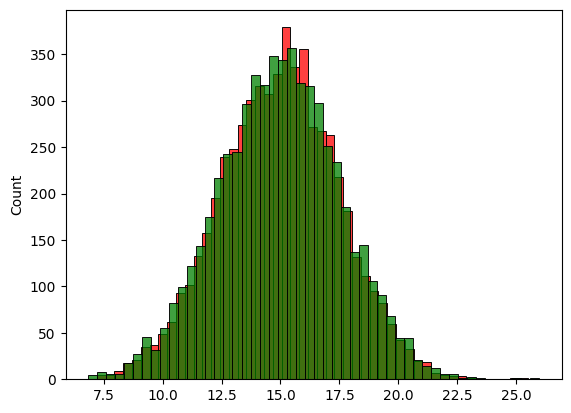

In [ ]:
sns.histplot(y_pred,color='red')
sns.histplot(y_train_1,color='green')

In [ ]:
def rmse(y_pred,y):
  error = (y_pred-y)**2
  mean_error = np.mean(error)
  rmse = np.sqrt(mean_error)
  return rmse

In [ ]:
rmse(y_pred,y_train_1)

np.float64(0.5203457641474558)

In [ ]:
x_val_1 = df_val_1[['engine_displacement','horsepower','vehicle_weight','model_year']].values
y_val_1 = df_val_1['fuel_efficiency_mpg'].values

In [ ]:
y_pred_1_val = w0 + x_val_1.dot(w)

In [ ]:
rmse(y_pred_1_val,y_val_1)

np.float64(0.5171866956555489)

In [ ]:
df_train_2 = df_train.copy()
df_val_2 = df_val.copy()
df_test_2 = df_test.copy()

In [ ]:
df_train_2.isnull().sum()

,0
engine_displacement,0
horsepower,429
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


In [ ]:
df_train_2['horsepower'].fillna(df_train_2['horsepower'].mean(),inplace=True)

/tmp/ipython-input-3218183431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_2['horsepower'].fillna(df_train_2['horsepower'].mean(),inplace=True)


In [ ]:
df_train_2.isnull().sum()

,0
engine_displacement,0
horsepower,0
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


In [ ]:
df_val_2['horsepower'].fillna(df_train_2['horsepower'].mean(),inplace=True)
df_test_2['horsepower'].fillna(df_train_2['horsepower'].mean(),inplace=True)

/tmp/ipython-input-241523883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_val_2['horsepower'].fillna(df_train_2['horsepower'].mean(),inplace=True)
/tmp/ipython-input-241523883.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [ ]:
X_train_2 = df_train_2[['engine_displacement','horsepower','vehicle_weight','model_year']].values
y_train_2 = df_train_2['fuel_efficiency_mpg'].values

In [ ]:
w0_2,w2 = linear_reg(X_train_2,y_train_2)

In [ ]:
w0_2,w2

(np.float64(28.907110616444456),
 array([ 0.00012034,  0.01030286, -0.00500997, -0.00022574]))

In [ ]:
x_val_2 = df_val_2[['engine_displacement','horsepower','vehicle_weight','model_year']].values
y_val_2 = df_val_2['fuel_efficiency_mpg'].values

In [ ]:
y_pred_2_val = w0_2 + x_val_1.dot(w2)

In [ ]:
rmse(y_pred_2_val,y_val_2)

np.float64(0.611641716237067)

In [ ]:
def linear_reg_req(X,y,r):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones,X])
  XTX = X.T.dot(X)
  XTX = XTX + r * np.ones(XTX.shape[0])
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)
  return w_full[0],w_full[1:]

In [ ]:
for i in [0, 0.01, 0.1, 1, 5, 10, 100]:
  w0,w = linear_reg_req(X_train_1,y_train_1,i)
  y_pred = w0 + x_val_1.dot(w)
  print(i,rmse(y_pred,y_val_1))

0 0.5171866956555489
0.01 0.5169343505433448
0.1 0.5186274222688794
1 0.5221488885976598
5 0.5228115147792816
10 0.5229019865794129
100 0.5229849895219938


In [ ]:
def train_val_test(main,train_n,test_n,s):
  n = len(main)
  train_n = int(n*0.6)
  val_n = int(n*0.2)
  idx = np.arange(n)
  np.random.seed(s)
  np.random.shuffle(idx)
  df_train  = main.iloc[idx[:train_n]]
  df_val = main.iloc[idx[train_n:train_n+val_n]]
  df_test = main.iloc[idx[train_n+val_n:]]
  return df_train,df_val,df_test

In [ ]:
rms = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  df_train,df_val,df_test = train_val_test(main,train_n,test_n,s)
  df_train_1 = df_train.copy()
  df_val_1 = df_val.copy()
  df_test_1 = df_test.copy()
  df_train_1['horsepower'].fillna(0,inplace=True)
  df_val_1['horsepower'].fillna(0,inplace=True)
  df_test_1['horsepower'].fillna(0,inplace=True)
  X_train_1 = df_train_1[['engine_displacement','horsepower','vehicle_weight','model_year']].values
  y_train_1 = df_train_1['fuel_efficiency_mpg'].values
  w0,w=linear_reg(X_train_1,y_train_1)
  x_val_1 = df_val_1[['engine_displacement','horsepower','vehicle_weight','model_year']].values
  y_val_1 = df_val_1['fuel_efficiency_mpg'].values
  y_pred_1_val = w0 + x_val_1.dot(w)
  rms.append(rmse(y_pred_1_val,y_val_1))


/tmp/ipython-input-3582704299.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_1['horsepower'].fillna(0,inplace=True)
/tmp/ipython-input-3582704299.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
print(rms)

[np.float64(0.5210993169575029), np.float64(0.5218422383637982), np.float64(0.5230384519921711), np.float64(0.5161215334679159), np.float64(0.5111869530228665), np.float64(0.5286833855487454), np.float64(0.5322418918536721), np.float64(0.5095258233917545), np.float64(0.5149083792385314), np.float64(0.5131330922635593)]


In [ ]:
np.std(rms)

np.float64(0.007126319126262675)

In [ ]:
df_train_1

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
9066,240,136.0,4050.512290,2006,10.304700
3073,190,141.0,3195.866942,2017,13.479434
2476,200,184.0,3006.164370,2017,16.190653
658,200,0.0,2947.143980,2022,15.446503
954,250,132.0,3114.371978,2001,14.472172
...,...,...,...,...,...
9457,160,193.0,2419.736198,2022,18.504888
312,210,0.0,3012.170524,2001,16.194433
351,260,161.0,3022.148840,2021,14.769735
9170,140,0.0,3927.946098,2016,10.363254


In [ ]:
train2 = pd.concat([df_train_1,df_val_1])

In [ ]:
X = train2[['engine_displacement','horsepower','vehicle_weight','model_year']].values
y = train2['fuel_efficiency_mpg'].values

In [ ]:
w0,w = linear_reg_req(X,y,0.001)

In [ ]:
w0,w

(np.float64(26.95040011172725),
 array([ 1.62472050e-05,  3.56580427e-03, -5.01719850e-03,  1.28967783e-03]))

In [ ]:
y_test_pred = w0 + df_test_1[['engine_displacement','horsepower','vehicle_weight','model_year']].values.dot(w)

In [ ]:
rmse = rmse(y_test_pred,df_test_1['fuel_efficiency_mpg'].values)

In [ ]:
rmse

np.float64(0.5155043331193124)